In [15]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import patches as mpatches
from sklearn.feature_selection import r_regression

In [2]:
RawDataframe = pd.read_csv("LolData-100.csv", index_col="Game")

In [3]:
MyTopSeries = pd.value_counts(RawDataframe['My Top'])

In [4]:
EnemyTopSeries = pd.value_counts(RawDataframe["Enemy Top"])

In [5]:
ChampionsSeries = MyTopSeries.add(EnemyTopSeries, fill_value=0)

In [6]:
ChampionsDF = pd.concat([MyTopSeries, EnemyTopSeries], axis=1)
ChampionsDF = ChampionsDF.fillna(0)
ChampionsDF = ChampionsDF.sort_index(key=ChampionsDF.sum(1).get, ascending=False)

In [7]:
x = ChampionsDF.index

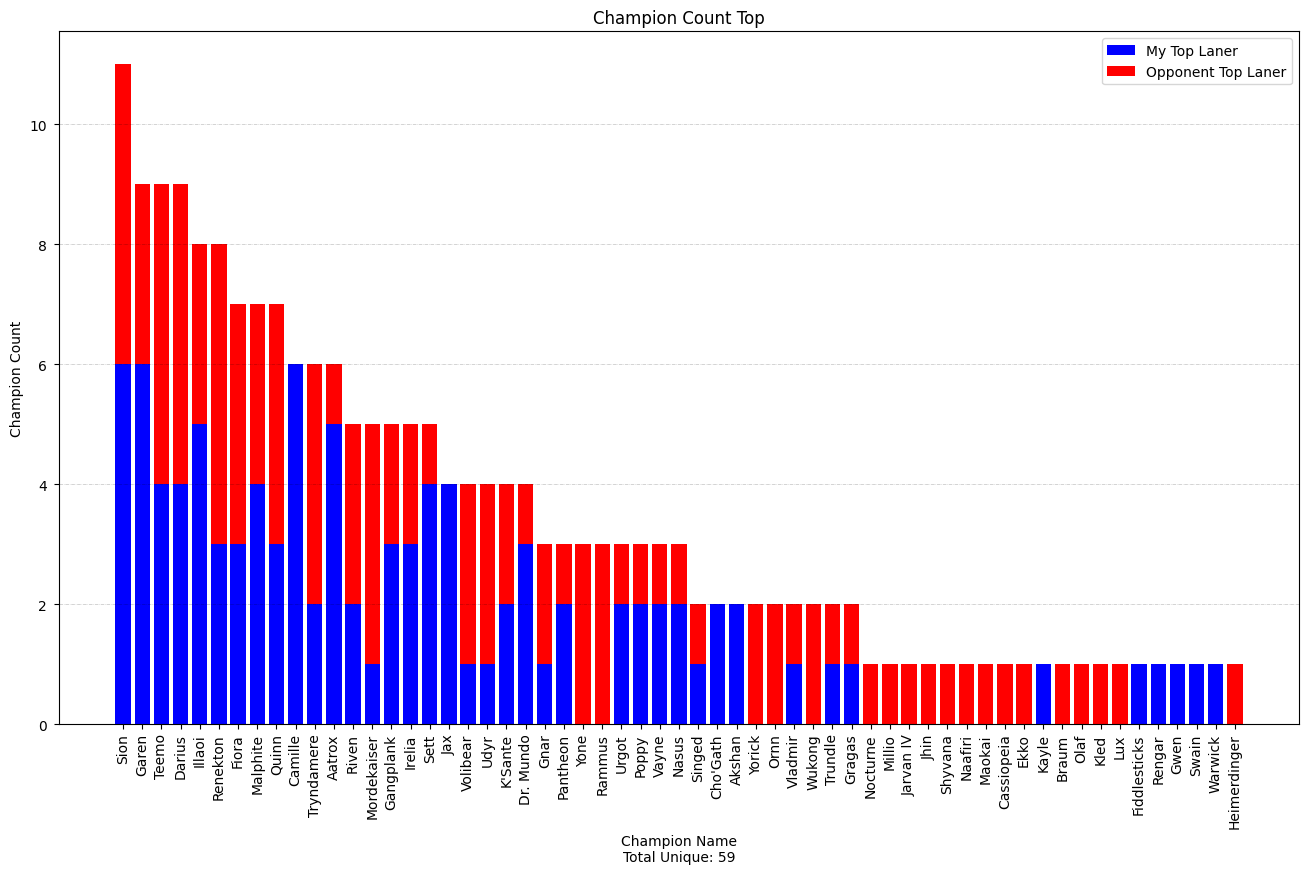

In [8]:
fig, ax = plt.subplots(figsize=(16, 9))
y = ChampionsDF["My Top"]
ax.bar(x, y, color='b')
y2= ChampionsDF["Enemy Top"]
ax.bar(x, y2, bottom=y, color='r')
plt.title("Champion Count Top")
plt.xlabel('Champion Name\nTotal Unique: ' + str(len(ChampionsDF)))
plt.ylabel('Champion Count')
plt.legend(["My Top Laner", "Opponent Top Laner"])
ax.xaxis.set_tick_params(pad = 3, rotation = 90)
ax.yaxis.set_tick_params(pad = 5)
ax.grid(axis= 'y', color= 'black', linestyle='-.', linewidth=0.4, alpha = 0.3)
plt.savefig("Top_Champion_Count_" + str(len(RawDataframe)) + ".png", bbox_inches="tight")

In [9]:
KDADataframe = RawDataframe.sort_values(by=['KDA difference Average'])[['Top KDA difference', 'Bot lane KDA Average', 'Mid/JGl/Top KDA Average', 'KDA difference Average', 'Win/Loss']]

In [10]:
KDADataframe

,Top KDA difference,Bot lane KDA Average,Mid/JGl/Top KDA Average,KDA difference Average,Win/Loss
Game,,,,,
60,-12.7,-9.5,-14.7,-12.6,L
44,-3.2,-18.5,-8.5,-12.5,L
98,-12.6,-13.1,-6.4,-9.1,L
7,-2.4,-13.4,-6.1,-9.0,L
21,-3.5,-10.9,-6.3,-8.1,L
...,...,...,...,...,...
79,0.5,7.6,6.2,6.7,W
3,7.1,5.5,7.9,6.9,W
12,4.2,10.2,5.0,7.1,W


In [19]:
def assign_color(win):
    if win == 'W':
        return 'b'
    return 'r'
def assign_value(color):
    if color == 'b':
        return 1
    return 0

In [12]:
KDADataframe['Win/Loss'] = KDADataframe['Win/Loss'].apply(assign_color)

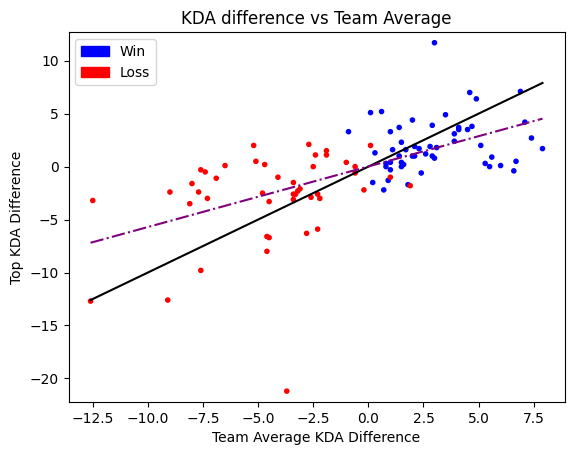

In [13]:
fig.clear()
ax.clear()
plt.scatter(KDADataframe['KDA difference Average'], KDADataframe['Top KDA difference'], c=KDADataframe['Win/Loss'], marker='.')
plt.title('KDA difference vs Team Average')
plt.xlabel('Team Average KDA Difference')
plt.ylabel('Top KDA Difference')
ax.xaxis.set_tick_params(pad = 3)
ax.yaxis.set_tick_params(pad = 5)
plt.xlim(KDADataframe['KDA difference Average'].min() - 1, KDADataframe['KDA difference Average'].max() + 1)
plt.ylim(KDADataframe['Top KDA difference'].min() - 1, KDADataframe['Top KDA difference'].max() + 1)
plt.plot(KDADataframe['KDA difference Average'], KDADataframe['KDA difference Average'], c='black')

z = np.polyfit(KDADataframe['KDA difference Average'], KDADataframe['Top KDA difference'], 1)
p = np.poly1d(z)
plt.plot(KDADataframe['KDA difference Average'], p(KDADataframe['KDA difference Average']), c='purple', linestyle='dashdot')

bPatch = mpatches.Patch(color='b', label='Win')
rPatch = mpatches.Patch(color='r', label='Loss')
plt.legend(handles=[bPatch, rPatch])

plt.savefig("Top_KDA_Difference_VS_Team_Average_" + str(len(RawDataframe)) + ".png", bbox_inches='tight')

In [20]:
KDADataframe['Win/Loss'] = KDADataframe['Win/Loss'].apply(assign_value)

In [39]:
correlationToTopCentered = r_regression(KDADataframe[['Bot lane KDA Average', 'Mid/JGl/Top KDA Average', 'KDA difference Average', 'Win/Loss']], KDADataframe['Top KDA difference'])
correlationToTopUncentered = r_regression(KDADataframe[['Bot lane KDA Average', 'Mid/JGl/Top KDA Average', 'KDA difference Average', 'Win/Loss']], KDADataframe['Top KDA difference'], center=False)

In [42]:
CToTopCenteredSeries = pd.Series(correlationToTopCentered, index=['Bot lane KDA Average', 'Mid/JGl/Top KDA Average', 'KDA difference Average', 'Win/Loss'])
CToTopUncenteredSeries = pd.Series(correlationToTopUncentered, index=['Bot lane KDA Average', 'Mid/JGl/Top KDA Average', 'KDA difference Average', 'Win/Loss'])

In [43]:
CToTopCenteredSeries.to_csv("Correlation_to_top_Centered_" + str(len(RawDataframe)) + ".csv")
CToTopUncenteredSeries.to_csv("Correlation_to_top_Uncentered_" + str(len(RawDataframe)) + ".csv")